# Data Ingestion

VerticaPy supports the ingestion of data in the following formats into Vertica:
- CSV
- JSON
- Parquet
- SHP
- ORC
- Avro
- pandas DataFrame

You can use the [`read_file()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_file.html) function to ingest all the above file types except pandas DataFrames and SHP, which instead use file-specific ingestion functions—[`read_pandas()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_pandas.html) and [`read_shp()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_shp.html). There are also file-specifc ingestion functions for [JSON](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_json.html), [Avro](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_avro.html), and [CSV](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_csv.html) files that use [flex tables](https://docs.vertica.com/latest/en/flex-tables/) to ingest the data.

Unless you specify the columns' data types with the `dtype` parameter, the ingestion functions automatically predict the data type of each column. If you provide the column data types, the function does not need to parse the file and predict data types, likely increasing ingestion speed and precision. For the `read_file()` function, if the file to ingest is located in the Vertica database, you must provide the column data types with the `dtype` parameter.

> **_NOTE:_** As performance optimizations made in the Vertica database are carried over to VerticaPy, try to optimize the structure of your projections for new tables in Vertica.

In the following sections, we will explore a few of the ingestion functions and some of the options they support.


## Ingest files with `read_file`

The `read_file()` function inspects and ingests files in any of the following formats:
- CSV
- Parquet
- ORC
- JSON
- Avro

Some of the supported function options include:
- `dtype`: provide a dictionary of data types for the columns, where the keys are the column names and the values are the column data types. The data types in the dictionary replace the automatically predicted data types.
- `insert`: if set to True, the data is ingested into the relation specified by the `table_name` and, optionally, the `schema` paraemters.
- `table_name`: specifies the name of the table to create in the Vertica database, or the name of the table to which the data is inserted. 
- `temporary_table`: if set to True, creates a temporary table.
- `ingest_local`: if set to True, the file is ingested from the local machine. In this case, the `dtypes` parameter is optional; if no value is provided, the function predicts the data type of each column.
- `genSQL`: if set to True, the function generates the SQL code the creates the table but does not execute it. This is a convenient way to check the final relation types.

For a full list of supported options, see the [documentation](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_file.html) or use the `help()` function.

> **_NOTE:_** All data files used in this tutorial are availble in the VerticaPy `datasets` directory. For demo purposes, the following examples ingest the data files using `read_file()` and other file-specific read functions. However, VerticaPy includes a set of [dataset loading functions](https://www.vertica.com/python/documentation/1.0.x/html/datasets.html) that allow you to easily ingest the data files in the `datasets` directory.

In the following examples, we will demonstrate how to use the `read_file()` function to ingest data into Vertica. Both file location options, in-database and local, will be explored. 

Let's begin with the case where the file is located in the database. We'll ingest the `iris.csv` file, a popular classification dataset. First, before we ingest the file, run the function with the `genSQL` parameter set to True to view the SQL that will be used to create the table. Because the file is located in the database, we must specify the data types for each column with the `dtypes` parameter:

> **_NOTE:_** For the examples in this tutorial, replace `path-to-file` in the `path` parameter with the path to the file in your Vertica database or local machine.

In [2]:
import verticapy as vp

vp.read_file(
    path = "path-to-file/iris.csv",
    dtype = {
        "Id": "Integer",
        "SepalLengthCm": "Numeric",
        "SepalWidthCm": "Numeric",
        "PetalLengthCm": "Numeric",
        "PetalWidthCm": "Numeric",
        "Species": "Varchar(20)",
    },
    schema = "public",
    genSQL = True,
)

['CREATE TABLE "public"."iris"("Id" Integer, "SepalLengthCm" Numeric, "SepalWidthCm" Numeric, "PetalLengthCm" Numeric, "PetalWidthCm" Numeric, "Species" Varchar(20))',
 'COPY "public"."iris"("Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species") FROM \'/home/dbadmin/verticapy/VerticaPy/verticapy/datasets/data/iris.csv\' UNCOMPRESSED DELIMITER \',\' NULL \'\' ENCLOSED BY \'"\' ESCAPE AS \'\x17\' SKIP 1']

To ingest the file into Vertica, remove the `genSQL` parameter from the above command and rerun the function:

> **_NOTE:_** If no table name is specified, the name of the file is used for the table name:

The table "public"."iris" has been successfully created.


,123IdInteger,123SepalLengthCmNumeric(39),123SepalWidthCmNumeric(39),123PetalLengthCmNumeric(39),123PetalWidthCmNumeric(39),AbcSpeciesVarchar(20)
1,45,5.1,3.8,1.9,0.4,Iris-setosa
2,57,6.3,3.3,4.7,1.6,Iris-versicolor
3,59,6.6,2.9,4.6,1.3,Iris-versicolor
4,71,5.9,3.2,4.8,1.8,Iris-versicolor
5,90,5.5,2.5,4.0,1.3,Iris-versicolor
6,102,5.8,2.7,5.1,1.9,Iris-virginica
7,103,7.1,3.0,5.9,2.1,Iris-virginica
8,115,5.8,2.8,5.1,2.4,Iris-virginica
9,119,7.7,2.6,6.9,2.3,Iris-virginica
10,122,5.6,2.8,4.9,2.0,Iris-virginica

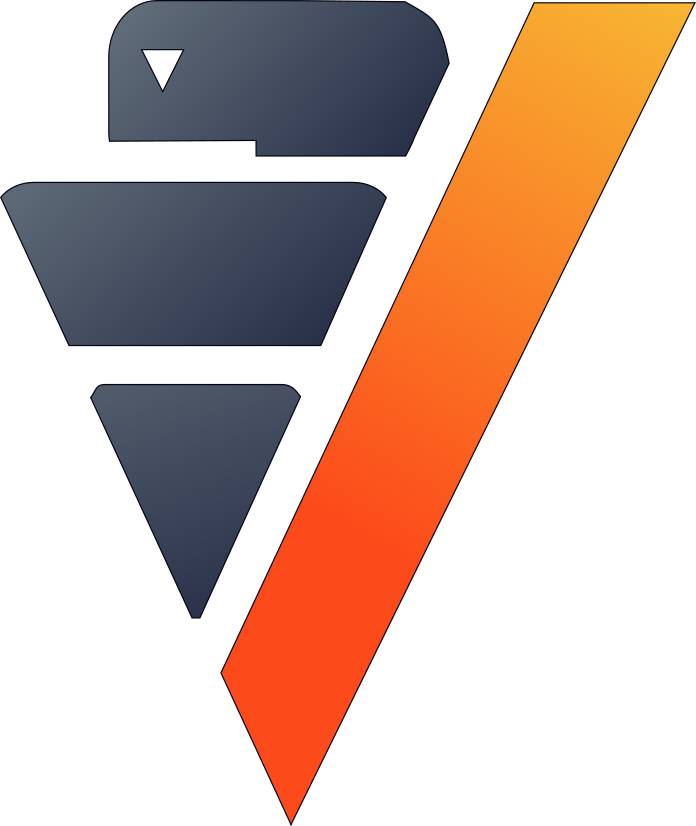

In [3]:
vp.read_file(
    path = "path-to-file/iris.csv",
    dtype = {
        "Id": "Integer",
        "SepalLengthCm": "Numeric",
        "SepalWidthCm": "Numeric",
        "PetalLengthCm": "Numeric",
        "PetalWidthCm": "Numeric",
        "Species": "Varchar(20)",
    },
    schema = "public",
)

When the file to ingest is located on your local machine, you must set the `ingest_local` parameter to True:

> **_NOTE:_** In some cases where the CSV file has a very complex structure, local ingestion might fail. If this occurs, you will have to move the file into the database and then ingest the file from that location.

The table "public"."iris_local" has been successfully created.


,123IdInteger,123SepalLengthCmNumeric(7),123SepalWidthCmNumeric(7),123PetalLengthCmNumeric(7),123PetalWidthCmNumeric(7),AbcSpeciesVarchar(30)
1,22,5.1,3.7,1.5,0.4,Iris-setosa
2,33,5.2,4.1,1.5,0.1,Iris-setosa
3,37,5.5,3.5,1.3,0.2,Iris-setosa
4,42,4.5,2.3,1.3,0.3,Iris-setosa
5,57,6.3,3.3,4.7,1.6,Iris-versicolor
6,68,5.8,2.7,4.1,1.0,Iris-versicolor
7,72,6.1,2.8,4.0,1.3,Iris-versicolor
8,75,6.4,2.9,4.3,1.3,Iris-versicolor
9,107,4.9,2.5,4.5,1.7,Iris-virginica
10,108,7.3,2.9,6.3,1.8,Iris-virginica

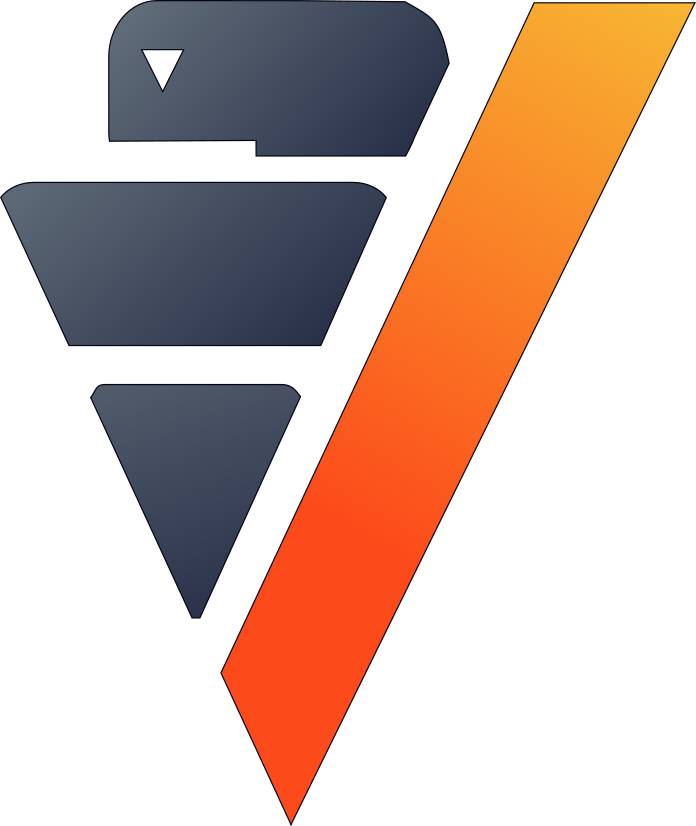

In [5]:
vp.read_file(
    path = "path-to-file/iris.csv",
    schema = "public",
    table_name = "iris_local",
    ingest_local = True,
)

To ingest multiple files of the same type, use the following syntax in the `path` parameter (in this case for multiple CSV files):
`path = "`*`path-to-files`*`/*.csv"`

## Ingest CSV files

In addition to `read_file()`, you can also ingest CSV files with the `read_csv()` function, which ingests the file using flex tables. This function provides options not available in `read_file()`, such as:
- `sep`: specify the column separator.
- `parse_nrows`: the function creates a file of nrows from the data file to identify the data types. This file is then dropped and the entire data file is ingested. If your data file is large, this data type inference process should speed up the file ingestion speed.
- `materialize`: if set to True, the flex table used to ingest the data file is materialized into a table; otherwise, the data remains in a flex table.

For a full list of supported options, see the `read_csv()` [reference page](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_csv.html) or use the `help()` function.

In the following example, we will use `read_csv()` to ingest a subset of the [Titanic dataset](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.datasets.load_titanic.html). To begin, load the entire Titanic dataset using the `load_titanic()` function: 

In [6]:
from verticapy.datasets import load_titanic

titanic = load_titanic()

To convert a subset of the dataset to a CSV file, select the desired rows in the dataset and use the [`to_csv()`](https://www.vertica.com/python/documentation/1.0.x/html/verticapy.vDataFrame.to_csv.html) vDataFrame method:

In [7]:
titanic[0:50].to_csv(
    path = "titanic_subset.csv"
)

Before ingesting the above CSV file, we can check its columns and their data types with the [`pcsv()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.pcsv.html) function:

In [8]:
vp.pcsv(path = "titanic_subset.csv",
    sep = ",",
    na_rep = "",    
)

{'sibsp': 'Integer',
 'sex': 'Varchar(20)',
 'pclass': 'Integer',
 'parch': 'Integer',
 'name': 'Varchar(112)',
 'fare': 'Numeric(11,6)',
 'embarked': 'Varchar(20)',
 'body': 'Integer',
 'age': 'Numeric(8,4)',
 'boat': 'Varchar(100)',
 'ticket': 'Varchar(24)',
 'survived': 'Integer',
 'home.dest': 'Varchar(92)',
 'cabin': 'Varchar(22)'}

Now, setting the `ingest_local` parameter to True, ingest the CSV file into the Vertica database:

The table "public"."titanic_subset" has been successfully created.


,123pclassInteger,123survivedInteger,AbcVarchar(112),AbcsexVarchar(20),123ageNumeric(10),123sibspInteger,123parchInteger,AbcticketVarchar(24),123fareNumeric(13),AbccabinVarchar(22),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(92)
1,1,0,,male,58.0,0,2,35273,113.275,D48,C,[null],122,
2,1,0,,male,51.0,0,1,PC 17597,61.3792,[null],C,[null],[null],
3,1,1,,female,14.0,1,2,113760,120.0,B96 B98,S,4,[null],
4,1,1,,female,[null],0,0,17421,110.8833,[null],C,4,[null],
5,1,1,,male,48.0,1,0,19996,52.0,C126,S,5 7,[null],
6,1,0,,male,17.0,0,0,113059,47.1,[null],S,[null],[null],
7,1,0,,male,31.0,1,0,F.C. 12750,52.0,B71,S,[null],[null],
8,1,0,,male,41.0,1,0,17464,51.8625,D21,S,[null],[null],
9,1,0,,male,57.0,1,0,PC 17569,146.5208,B78,C,[null],[null],
10,1,0,,male,64.0,1,0,110813,75.25,D37,C,[null],[null],

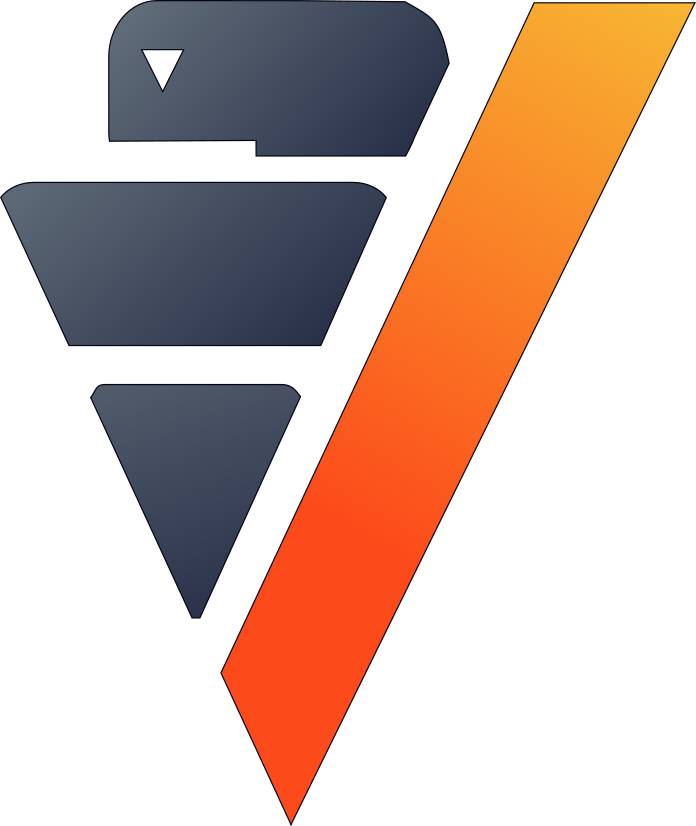

In [9]:
vp.read_csv("titanic_subset.csv",
    schema = "public",
    table_name = "titanic_subset",
    sep = ",",
    ingest_local = True
)

If we want to insert additional data from the original Titanic dataset into the `public.titanic_subset` table, we can do so by setting the `insert` parameter of the `read_csv()` function to True:

> **_TIP:_** You can also insert data into an existing Vertica table with the [`insert_into()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.insert_into.html) function.

,123pclassInteger,123survivedInteger,AbcVarchar(112),AbcsexVarchar(20),123ageNumeric(10),123sibspInteger,123parchInteger,AbcticketVarchar(24),123fareNumeric(13),AbccabinVarchar(22),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(92)
1,1,0,,male,[null],0,0,113791,26.55,[null],S,[null],[null],
2,1,0,,male,[null],0,0,113778,26.55,D34,S,[null],[null],
3,1,0,,male,45.0,1,0,36973,83.475,C83,S,[null],[null],
4,1,0,,male,42.0,0,0,113038,42.5,B11,S,[null],[null],
5,1,0,,male,[null],0,0,113028,26.55,C124,S,[null],[null],
6,1,1,,female,36.0,0,2,WE/P 5735,71.0,B22,S,7,[null],
7,1,1,,female,25.0,1,0,11765,55.4417,E50,C,5,[null],
8,1,1,,female,22.0,1,0,113776,66.6,C2,S,8,[null],
9,2,0,,male,29.0,1,0,2003,26.0,[null],S,[null],[null],
10,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,

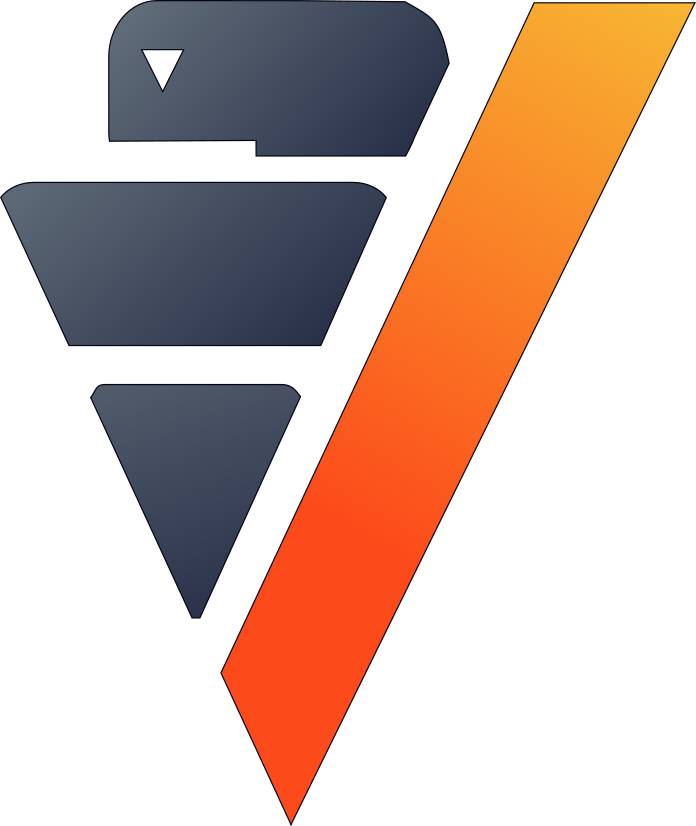

In [10]:
titanic[50:100].to_csv(
    path = "titanic_more_data.csv"
)

vp.read_csv("titanic_more_data.csv",
    schema = "public",
    table_name = "titanic_subset",
    sep = ",",
    insert = True
)

## Ingest JSON files

As with CSV files, VerticaPy provides a file-specific ingestion function for JSON files, `read_json()`, which supports additional options, including:
- `usecols`: provide a list of JSON parameters to ingest. Other JSON parameters are ignored.
- `start_point`: name the key in the JSON load data at which to begin parsing 
- `flatten_maps`: set whether sub-maps within the JSON data are flattened.
- `materialize`: if set to True, the flex table used to ingest the data is materialized into a table.

For a full list of supported options, see the `read_json()` [reference page](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_json.html) or use the `help()` function.

VerticaPy also provides a [`pjson()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.pjson.html) function to parse JSON files to identify columns and their respective data types.

In the following example, we load the iris dataset using the [`load_iris()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.datasets.load_iris.html) dataset, convert the vDataFrame to JSON format with the [`to_json()`](https://www.vertica.com/python/documentation/1.0.x/html/verticapy.vDataFrame.to_json.html) method, then ingest the JSON file into Vetica:

The table "public"."iris_ingest" has been successfully created.


,123PetalWidthCmFloat(22),123SepalWidthCmFloat(22),AbcSpeciesVarchar(30),123PetalLengthCmFloat(22),123SepalLengthCmFloat(22),123IdInteger
1,0.1,3.0,Iris-setosa,1.1,4.3,14
2,0.2,3.2,Iris-setosa,1.2,5.0,36
3,0.2,3.2,Iris-setosa,1.3,4.7,3
4,0.2,3.2,Iris-setosa,1.6,4.7,30
5,0.2,3.6,Iris-setosa,1.0,4.6,23
6,0.2,3.6,Iris-setosa,1.4,5.0,5
7,1.2,2.8,Iris-versicolor,4.7,6.1,74
8,1.2,3.0,Iris-versicolor,4.2,5.7,96
9,1.3,2.8,Iris-versicolor,4.5,5.7,56
10,1.4,2.6,Iris-virginica,5.6,6.1,135

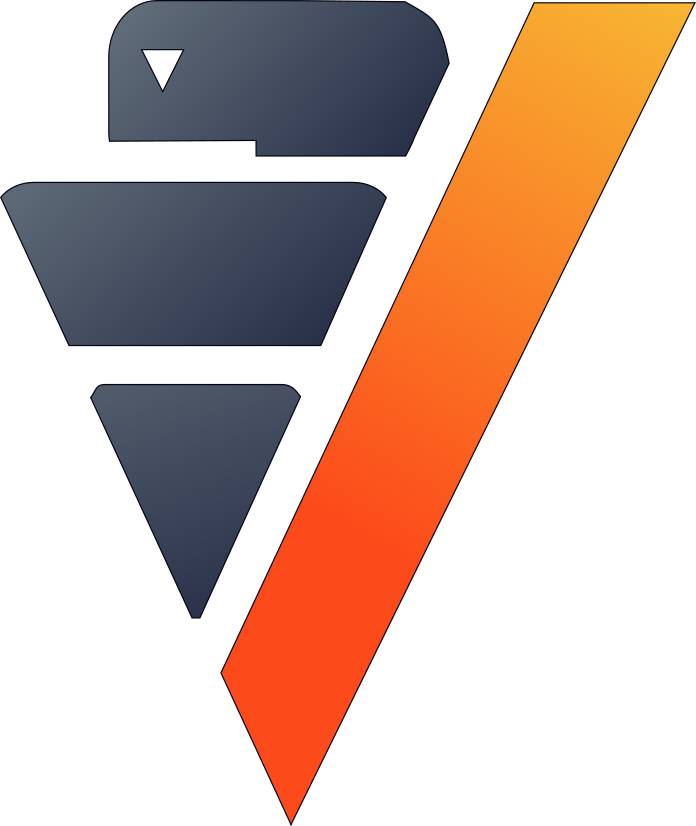

In [11]:
from verticapy.datasets import load_iris

iris = load_iris()
iris.to_json(
    path = "iris_local.json",
)
vp.read_json(
    path = "iris_local.json",
    table_name = "iris_ingest",
    schema = "public",
)

## Other file types

For more information about other file-specific ingestion functions, see the following reference pages, which include examples:
- pandas DataFrames: [`read_pandas()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_pandas.html) and [`pandas_to_vertica()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.pandas_to_vertica.html)
- Avro: [`read_avro()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_avro.html)
- SHP: [`read_shp()`](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.read_shp.html)